## Domain Adaption

Imagine you are a developer helping lawyer or medical officer summarize the content or any sort of help. Leagal writing uses words which are very rare outside of legal world. Same goes for medical related words or phrases. So already pre-trained model like ChatGPT, LLama or falcon won't perform that good on these domain specific tasks. So we're left with only option to pre-train it using domain specific data.

One such example is BloombergGPT which is trained for finance domain specifically along with some general data to perform better in non-finance related tasks too. Bloombert has ~51%  data from finance world and ~49% from other general data.

## Fine-tuning LLMs with Instruction

Previously we learned that if model doesn't give appropriate response or expected response then we may need to do little bit of prompt engineering by changing prompt. But even if it doesn't work then we may need to do incontext-learning like taking few-shot inference and checking response.

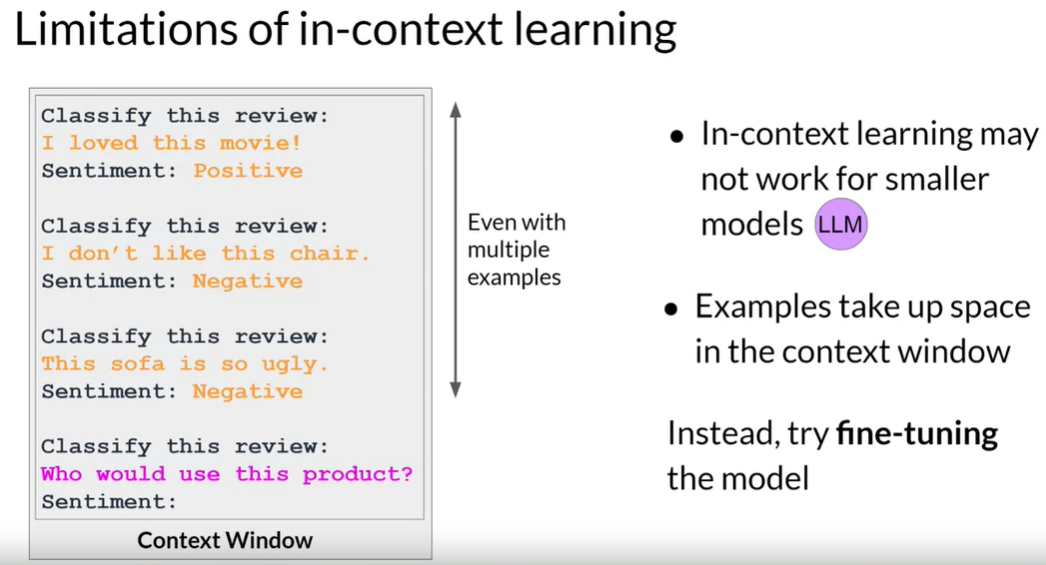

But sometimes even after few shot inferencing model doesn't produce desired output. This is mainly because model size is small. But we can further improve the performance by fine-tuning it over the instructions and its desired results(prompt-completion pair) like supervised learning.
This way model's performance is improved.

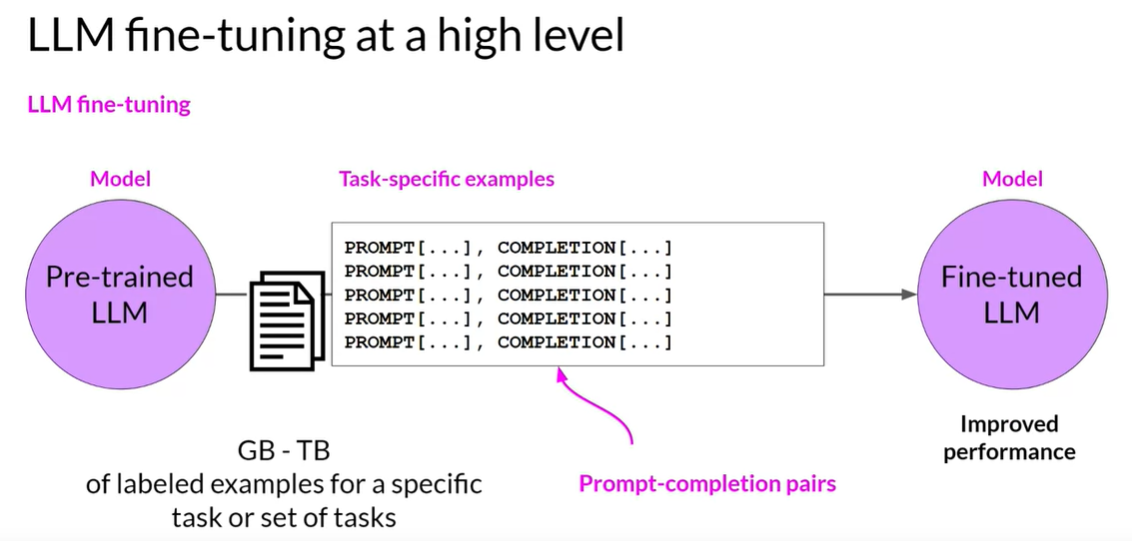

### Instruction fine-tuning

This startegy helps improve model's performance by teaching model in supervised way how it should response for specific instruction.
So this fine-tuning dataset will include many pairs of prompt-completions examples for the task we're interested in.

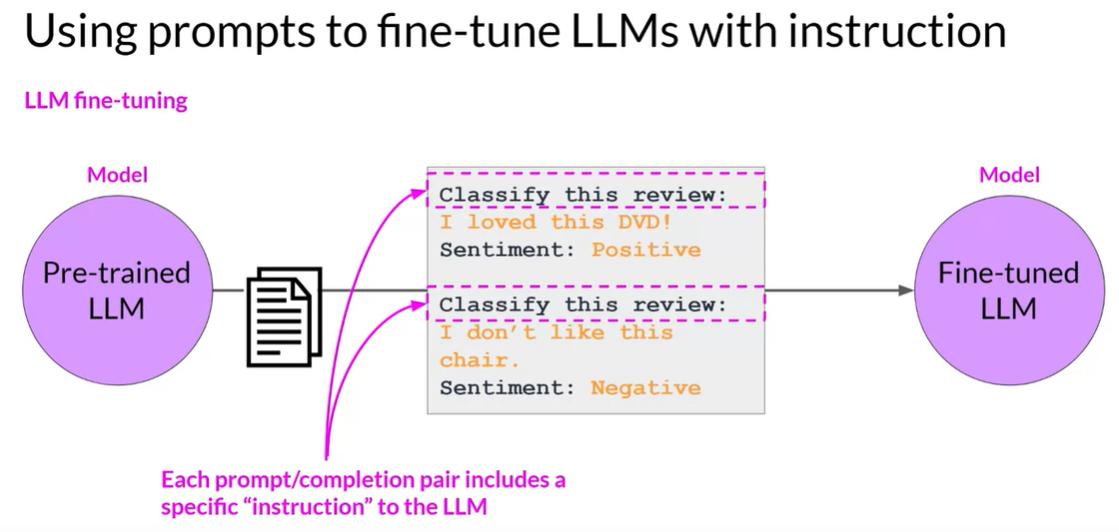

For example if we want to improve model's performance of task such as summarization, then we build up a data like with prompt "Summarize the following text:" then "example text" and "example completion". Same goes for any other task such as translation.

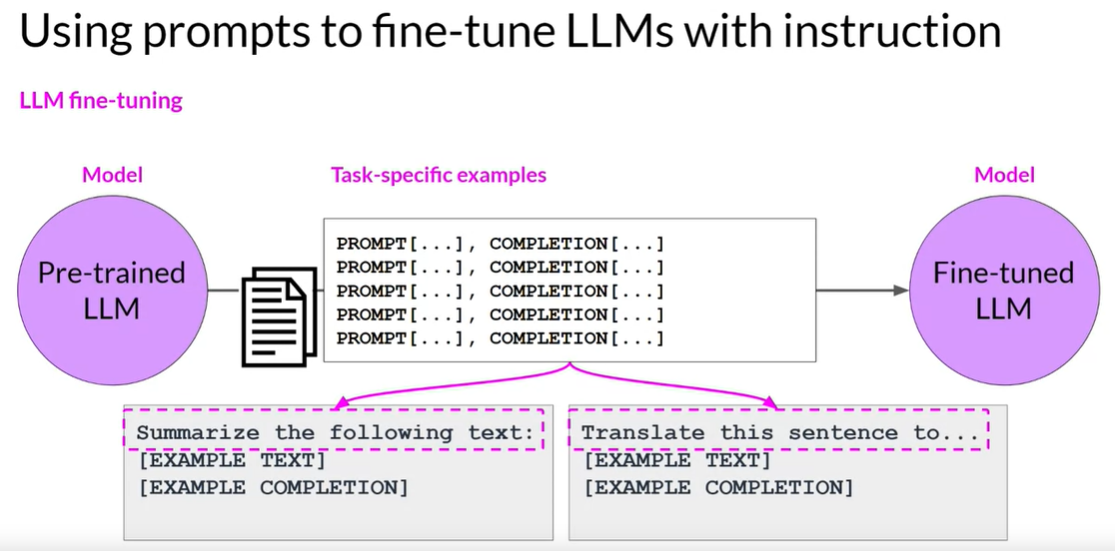

Instruction fine tuning where all of the model's weight are updated is known as full fine-tuning.
Note: Just like pre-training full fine-tuning requires same compute power and budget. Here also we can use same Multi-GPU strategy to optimize it.

Very first step in instruction fine-tuning is to generate data with prompt. There is lots of data available on internet using which many entry level models are pre-trained. But these data doesn't come with corresponding prompt. Luckyly we have prompt template library using which we can generate prompt for those data. For example large dataset of amazon product review and turn it into instruction prompt dataset for fine-tuning.

prompt-template library includes many prompt and template which we can use for fine tuning.
few examples are below:

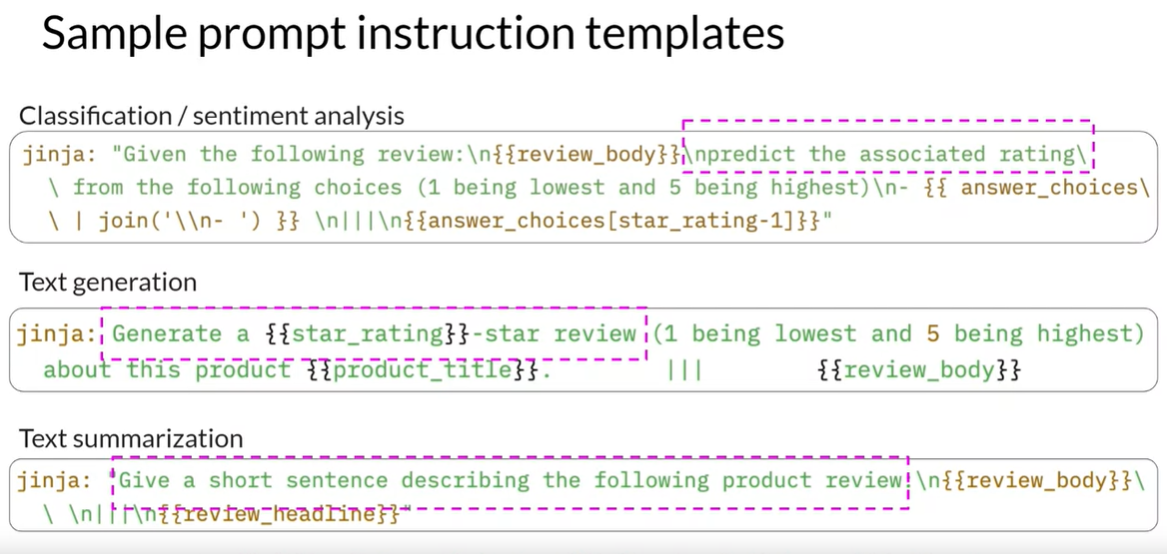

Once our data is ready then we will divide it into train, validation and test dataset. Using training dataset we will fine-tune the model and then we can validate the results on validation dataset and later on test dataset.

Just like standard supervised training we need to train it using training dataset and then calculate the loss and use that loss to update model weights in backpropogation. So that model will perform better after going through all examples.

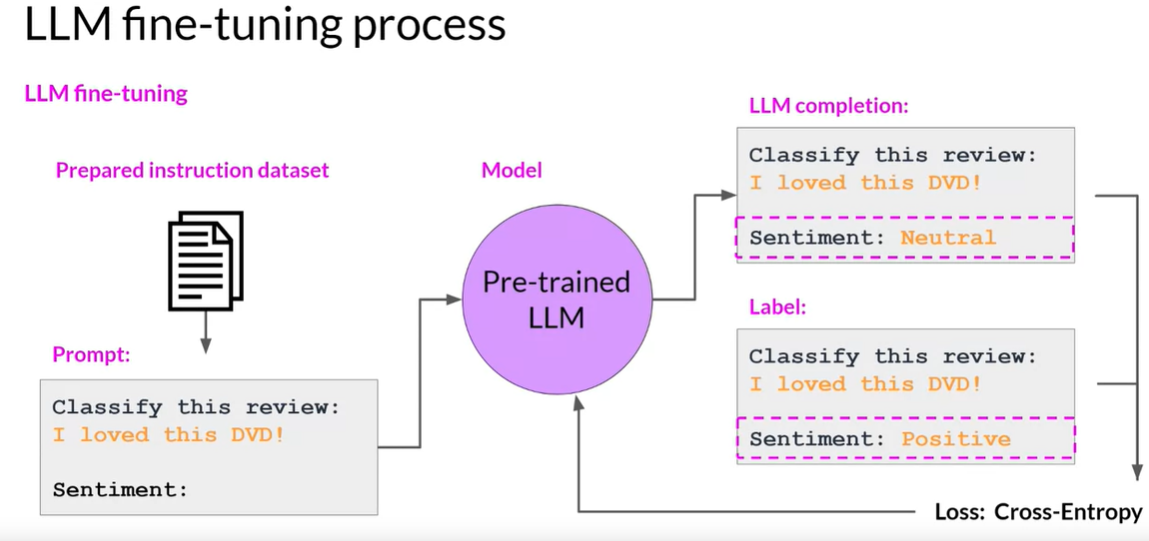

Fine-tuning process results in new version of base model often called as instruct model.

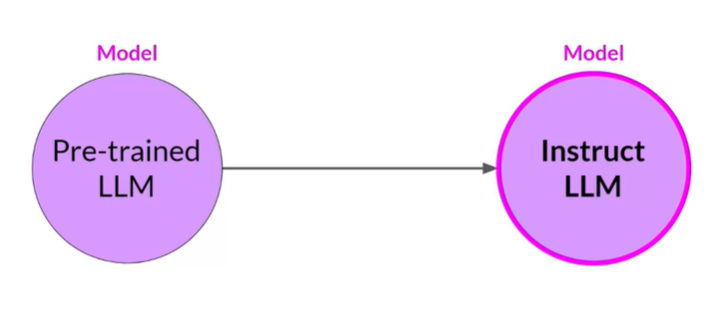


### Fine-tuning on single task

In this case we can fine tune the base model to further improve performance for only the task which is of our interest. As this will help us achieve better performance for that particular task and on top of that fine-tuning for single task won't need more example like 500-1000 examples. For example for summarization task we can fine tuned it using only dataset of summarization and with this we can achieve better performance.

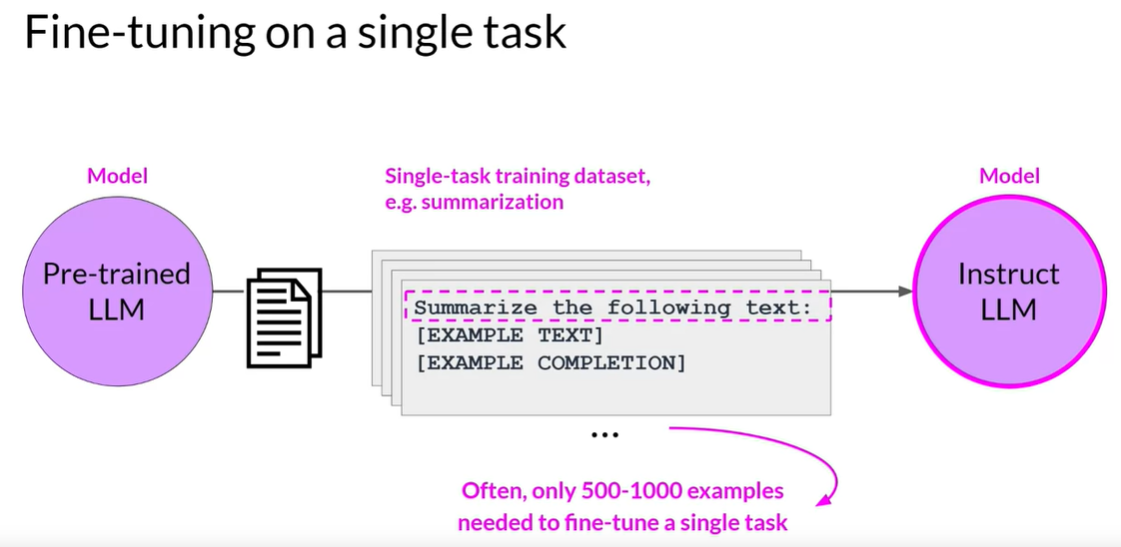

However, there is a disadvantage of using fine-tuning for single task. As model experiences **catastrophic foregetting**.

**Catastrophic Forgetting** happens because full fine-tunning for single task leads to update model weights and model forgets to perform on other tasks.

This shouldn't impact those who are going to use model only for that particular task.

#### How to avoid catastrophic forgetting 
1. Fine-tune on multiple tasks at the same time. (it will require 50-100k data to fine-tune on vaious tasks and also huge compute resources)<br>
2. Consider **Parameter Effiecient Fine-tuning (PEFT)**<br>
    PEFT is a set of techniques that preserves the weights of the original LLM and trains only a small number of task-specific adapter layers and parameters. PEFT shows greater robustness to catastrophic forgetting since most of the pre-trained weights are left unchanged.


### Multi-Task Instructution fine-tuning

This is extention of single task fine-tuning. Here we will need lot of data(approx 50-100k per task) to fine tune model for various tasks such as tasks including summarization, review rating, code translation, and entity recognition. After many epoch and updating weights of model it starts to perform better in those tasks. And it also avoids catastrophic forgetting.

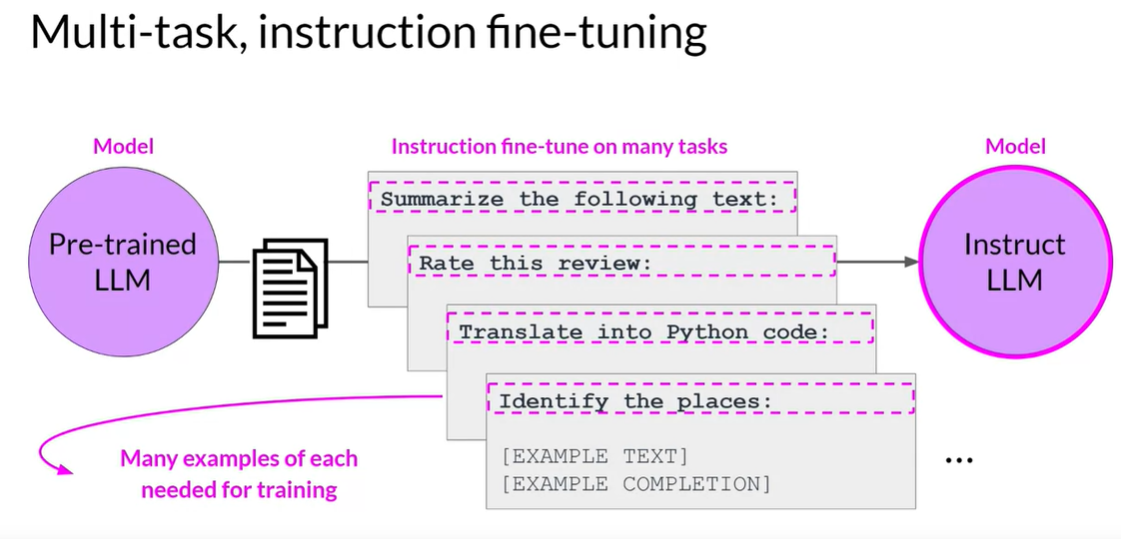

For example FLAN(Fine Tuned Language Net) family models which are fine-tuned using multi-task instruction fune-tuning.

Summarization template for samsum dataset:

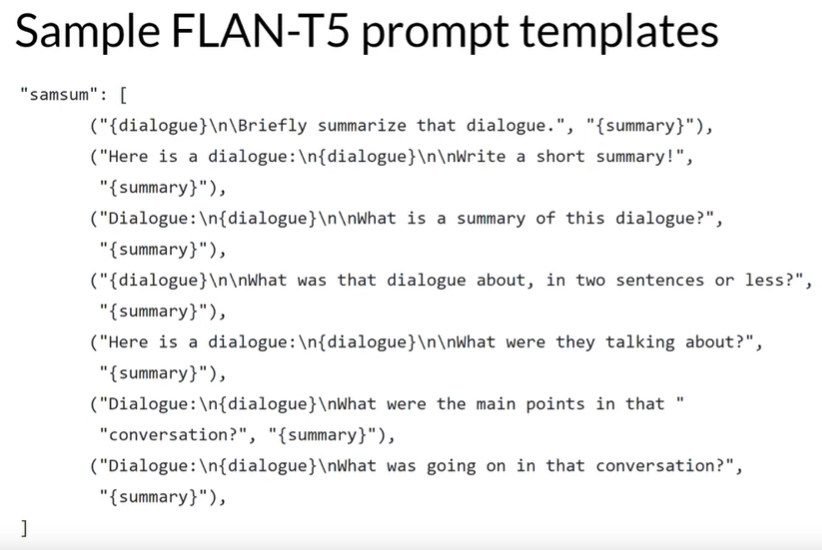

One of task where FlAN-T5 model is not finetuned on dialogsum. Where task of model is to take conversation from chatbot and summarize it.
So model without fine-tuning doesn't work great but after fine-tuning it worked awesome.


## Model Evaluation

In traditional machine learning we can calculate how good model is performing using some evaluation metrics like accuracy. This is possible because model's output is deterministics i.e. we know extact output of model.
But incase of non-deterministic model, output of model is not repeatative or same but rather it generates new output. 

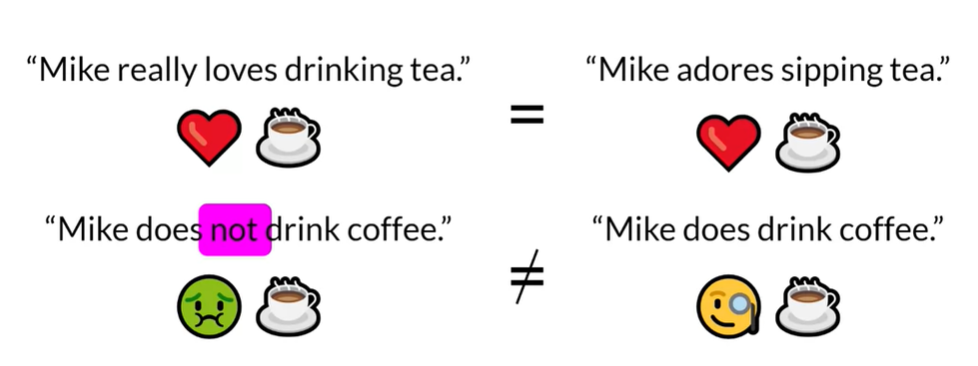

So if we can't even use text-similarity metrics because even single words like "not" can change meaning of sentence as mentioned in above fig.

So we can use merics like **ROUGE(Recall Oriented Understudy for Gisting Evaluation)** and **BLEU(Bilingual Evaluation Understudy)** which are most widely used evaluation metrics.

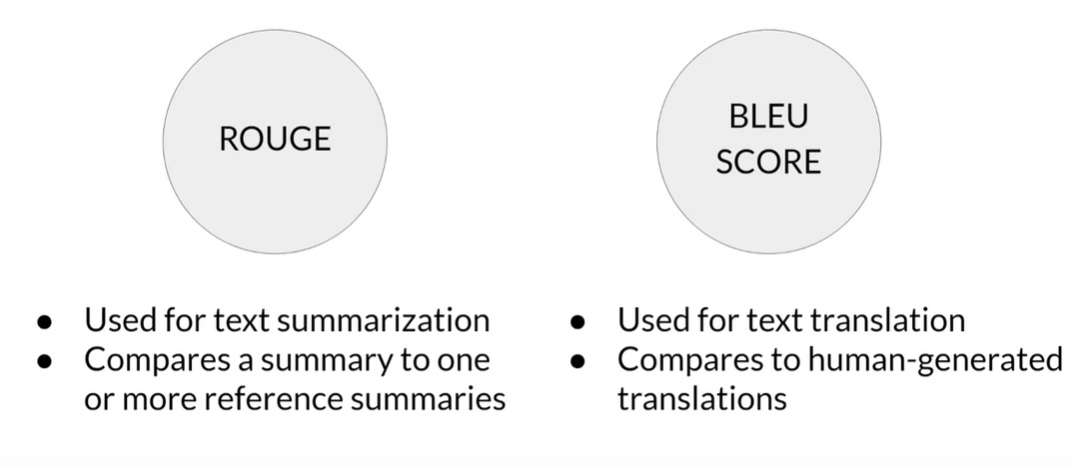

## ROUGE(Recall Oriented Understudy for Gisting Evaluation)
ROUGE is specifically used to compare output generated by LLM with human written for tasks like summarization.
ROUGE uses 1 or n-gram approach to find similarity between 2 sentences.

ROUGE-1 which uses unigram or single words to calculate recall, precision and f1 score.

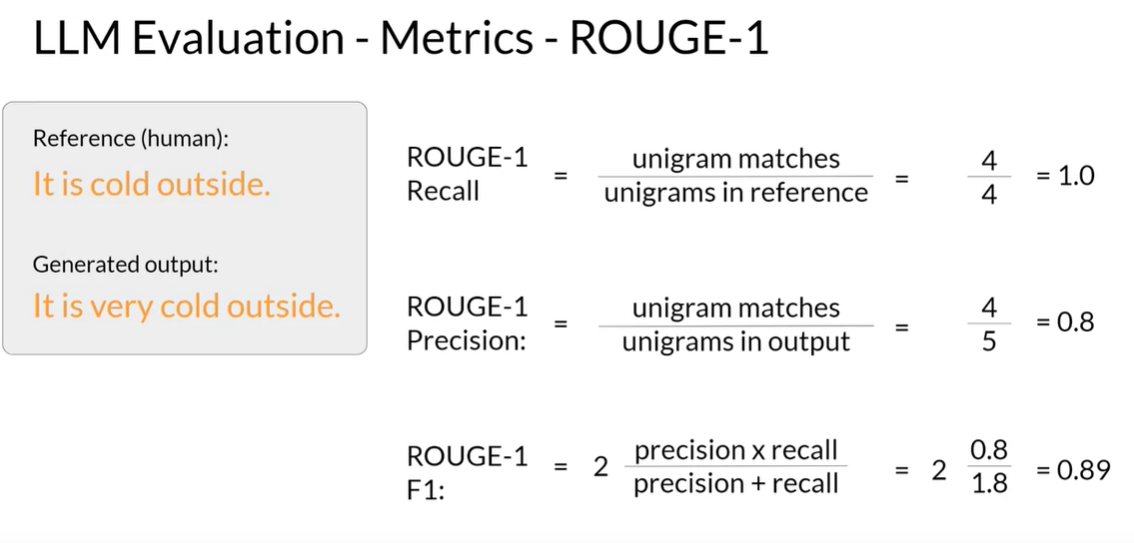

As mentioned in above fig recall is number of matching words between generated text and reference text.
Precision is fraction of number of matching words and total number of generated words.
F1 score is harmonic mean.

Issue with ROUGE-1 is even if order of words changes or even change in additional single word in generated text apart from words which are there in reference text then also scores will be bigger.

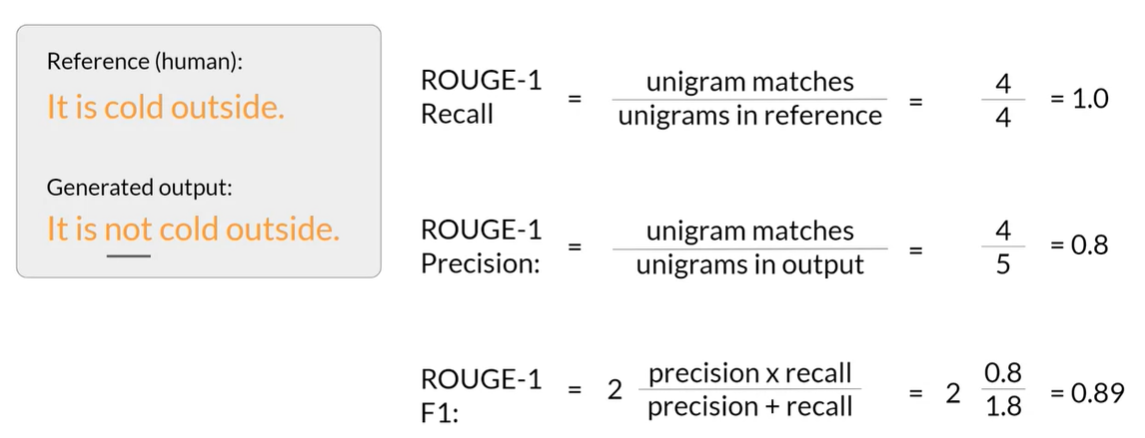

ROUGE 2 uses bigram rather than unigram. So it looks as order of words and also scores less for same generated text as compared to ROUGE 1.

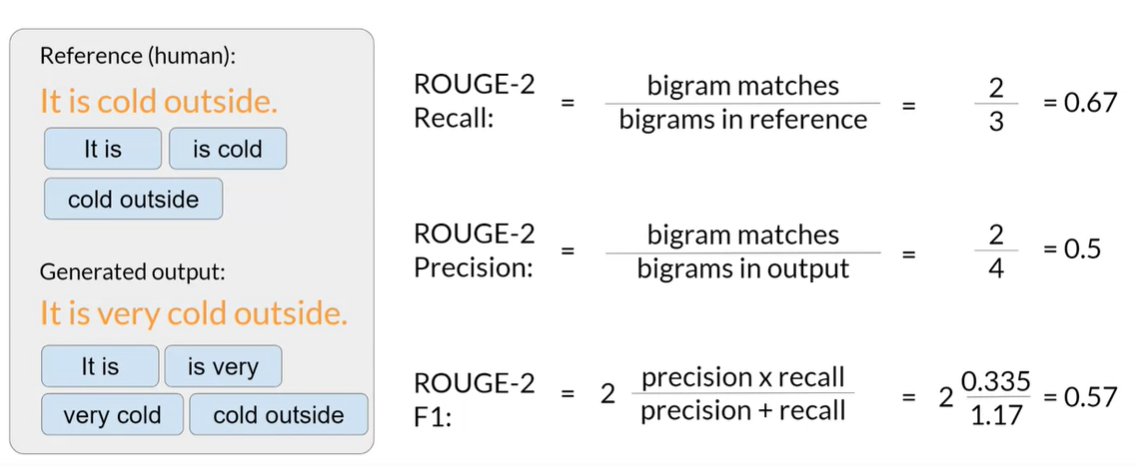

**ROUGE-L**: Rather than continue on with ROUGE numbers growing bigger to n-grams of three or fours, let's take a different approach. Instead, you'll look for the longest common subsequence present in both the generated output and the reference output. 

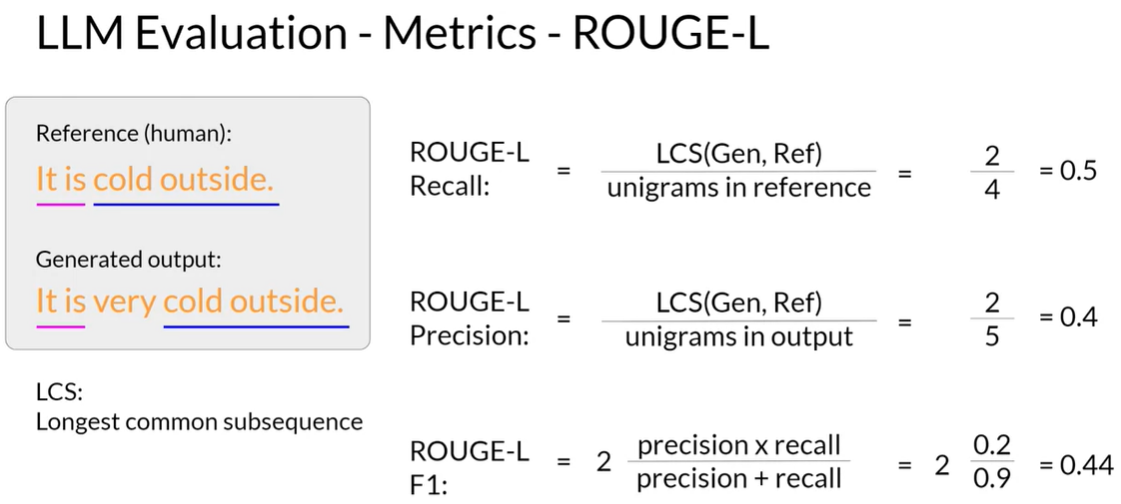

ROUGE scores for different tasks are not comparable with one another.

HuggingFace has implementation of ROUGE Score which we can use to evaluate model's performance.


### BLEU(Bilingual Evaluation Understudy) Score

BLEU score is useful for evaluating the quality of machine-translated text. The score itself is calculated using the average precision over multiple n-gram sizes.
HuggingFace has already implemented this evaluation metric, so we can easily use it.

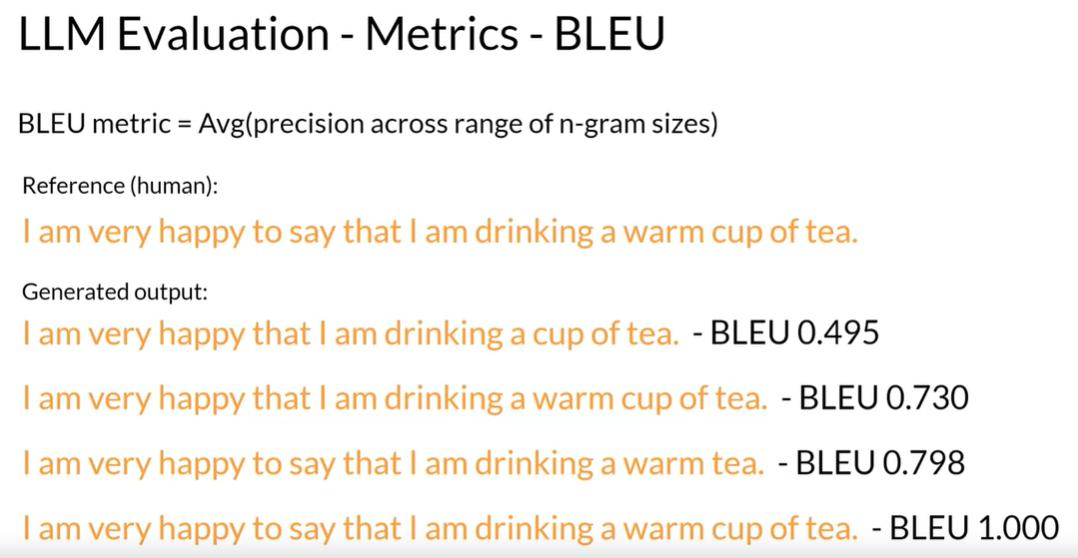




## Benchmarks

Simple evaluation metrics like ROUGE and BLEU can only tell you capabilities of model. To evaluate your model more holistically we need additional pre-existing datasets and its associated benchmarks which is established by LLM researchers. 

Benchmark dataset helps evaluate model on the ground of biases in model, or common sense of model, potential risks or disinformation. We will get more accurate and more usefull sense of model's capabilities by evaluating it against dataset which model has not see earlier. 

Most common benchmarks are **GLUE(General Language Understanding Evaluation)**, **SuperGLUE**, **HELM** cover wide range of scenarios to test specific aspects of LLMs.

**GLUE** is collection of natural language tasks such as question answering, sentiment classification.
**SuperGLUE** is successor of GLUE, it was introduced to address limitations of GLUE. It has tasks which are not there in GLUE and more challenging versions of tasks than those present in GLUE. SuperGLUE contains tasks such as multi-sentence reasoning and reading comprehension. 

We can see performance of all LLMs on these benchmark's leaderboard. As model gets larger their performance on bechmark such as superglue, their performance starts to match human ability. Using these benchmark we can see that model's are performance at human level for tasks in benchmark test but subjectively these LLMs are not doing good at task in general. So to solve this we need new benchmarks.

**Massive Multitask Language Understanding(MMLU)** is designed specifically for modern LLM. Model's are tested against elementary mathematics, computer science, laws and many more. These tasks are more complex than basic language understanding.
Also we have other benchmark such as **Big-bench Hard, Big-bench, Lite**. These benchmarks test models performance again various subjects such as biliogy, software development, and many more. So testing against these benchmark is compute expensive.
Final benchmark is **Holistic Evaluation of Language Model(HELM)**. HELM framework help improve transperancy of model. It takes multi-metric approach and evaluates model using 7 different metrics for 16 different scenarios insuring trade-off between models and metrics are clearly exposed. One important feature of HELM is that it evaluates model beyond basic metrics like accuracy, f1 score.

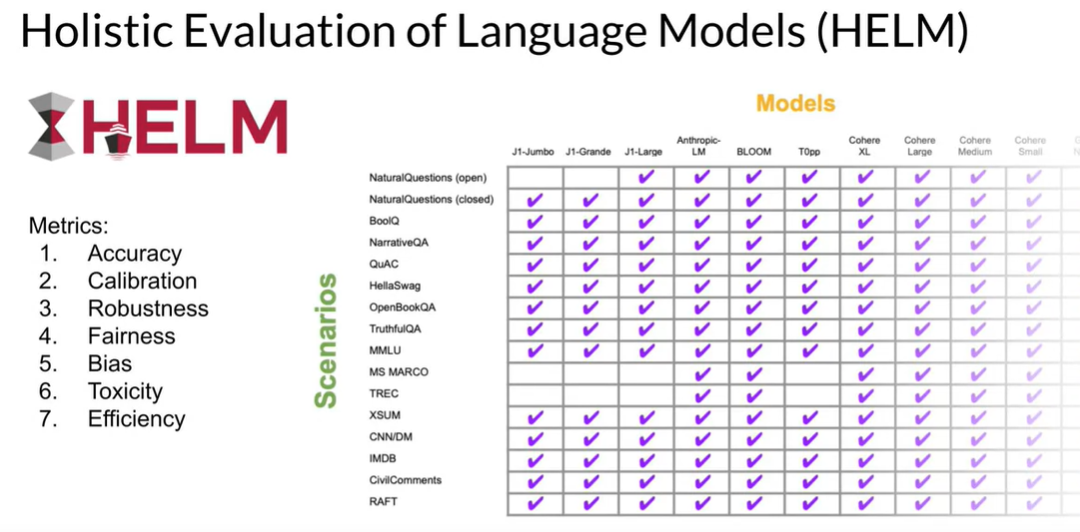



## Parameter Efficient Fine-Tuning

LLMs need few GigaBytes of memory but while training it also needs memory for optimizer states, Gradient, Activation Function and Temporary memory. These additional parameters boost the memory requirements to more than 100 of GigaBytes and which is very compute expensive. 

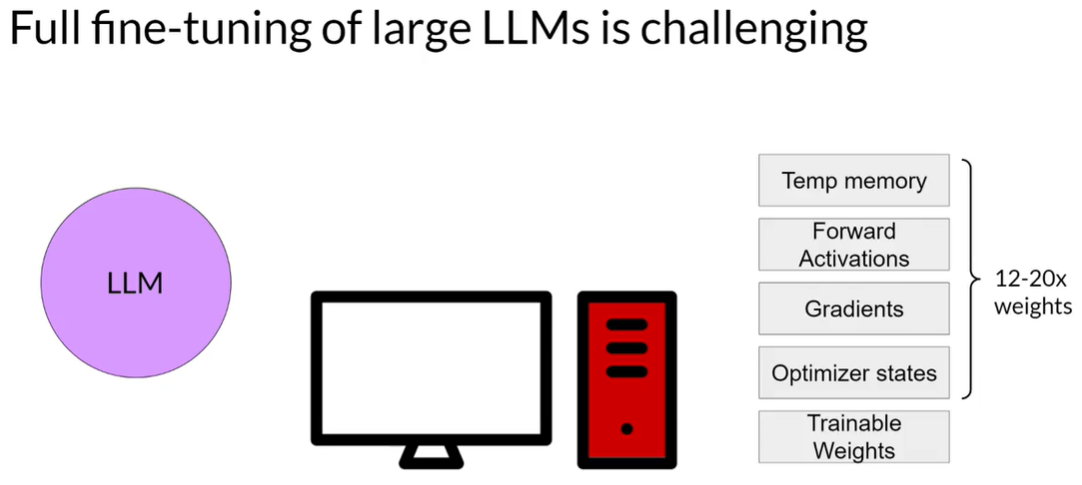

Fine-tuning updates all weights of model which is unnecessary. Rather it should only update small subset of weights. 

PEFT helps us achieve same objective. Some PEFT techniques freezes most of the model weights and we just need to update few weights(for eg particular layer or components) which will require at most single GPU. 

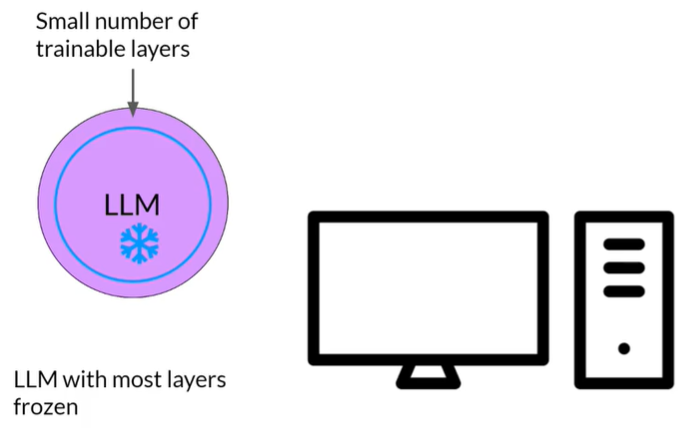

Other techniques adds additional layer and updates weights of only those.

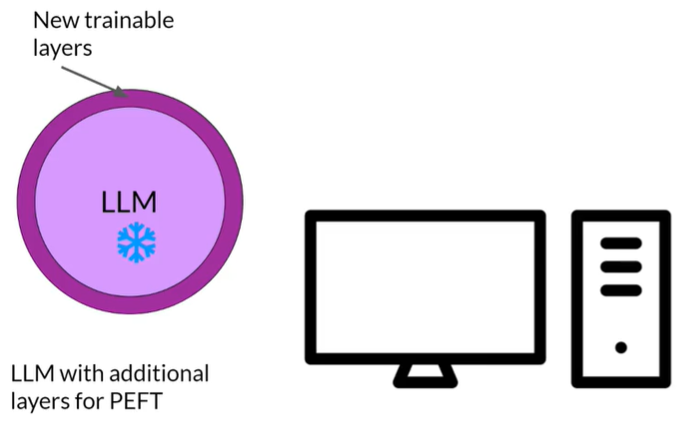

In PEFT most of the model weights are frozen and only few weights(10-20%) are updated. So memory requirement with PEFT is much smaller and PEFT can be performed using single GPU. Also as it only updates few weights we don't see catastrophic foregetting issue with it.

Full-Fine-tuning creates improved version of model for that particular tasks with same size as that of original. So if we're planning to use the models for multiple tasks then we need more memory to accomodate each task specific fine-tuned model.

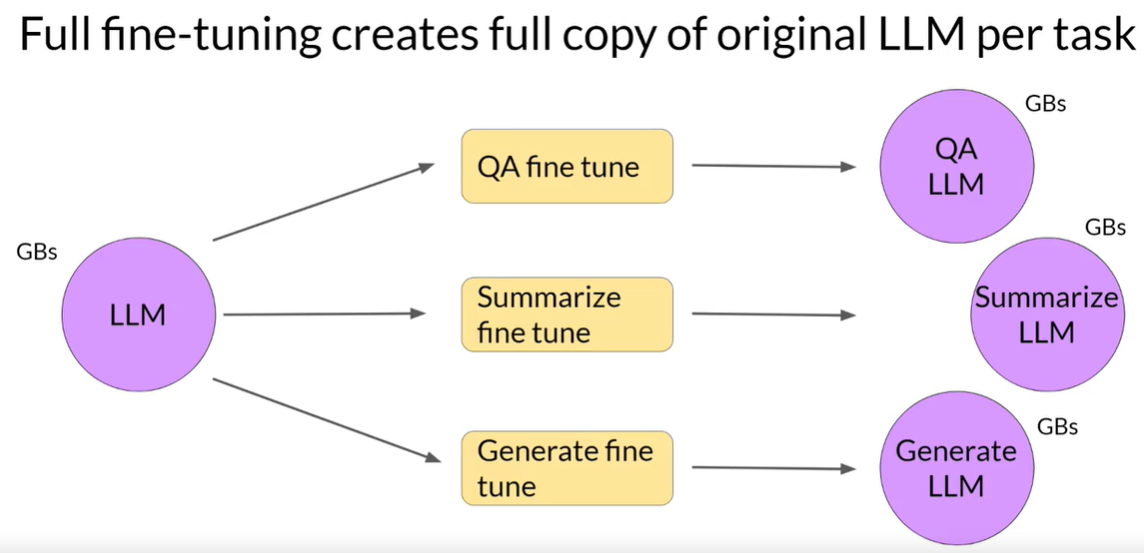

On the other hand, with PEFT we need to update only small number of weights, which requires very small memory like few MBs of memory. We can add these weights to base model to get fine-tuned version for each task of our need.

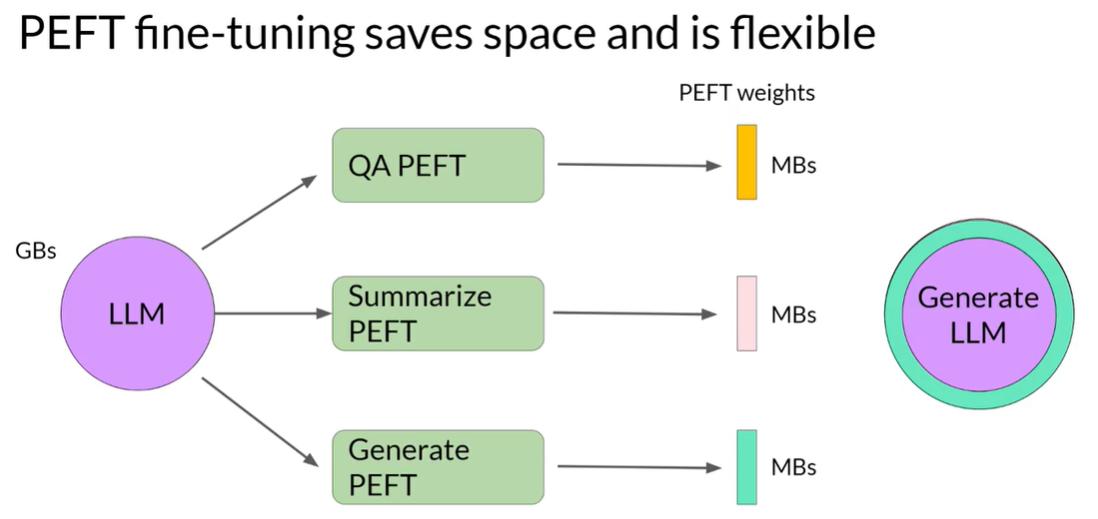

There are multiple techniques for PEFT, but all of them have some sort of trade-offs. All of them are mentioned in below image.

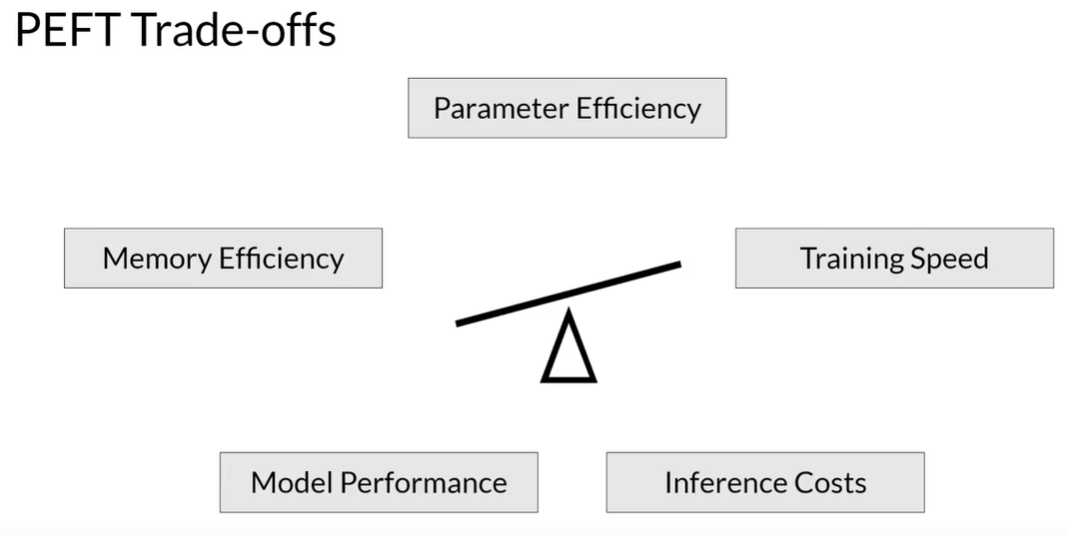

### PEFT Methods
Three main classes of PEFT method    
1. **Selection approach**: Here we will only train subset of original parameters. There are several approaches to identify which components of model or specific layers or even idividual parameter type we want to update. Researchers have found that performance of these methods are mix and there are significant trade-offs between parameter efficiency and compute efficiency. 

2. **Reparameterization method**: It also works with LLM and reduces the number of parameters require to train. Reparameterization technique transforms original network of weights into low rank transformation. LoRA uses this type of technique.

3. **Additive**: It fine-tunes by keeping all weights frozen and introduces new trainable component. There are 2 approaches, **Adapter approach** adds new trainable layers to the architecture of model typically inside enncoder and decoder of model, after feedforward and attention layer of architecture.  **Soft Prompts** on the other hand Keep the model architecture fixed and focused on manipulating input to achieve better performance. This can be done by adding trainable parameters to prompt embeddings or keep the input fixed and retraining embeddings. One of technique that help achieve this is **prompt tuning**.

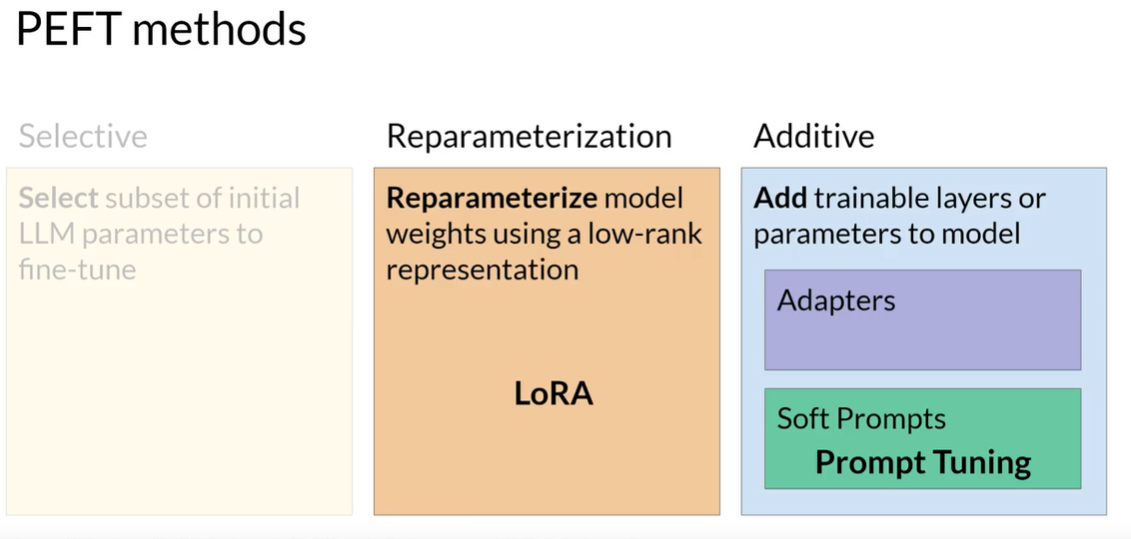

### Low-Rank Adaptation(LoRA)

In encoder or decorder part of transformer architecture, before attention weights we get embeddings. We freeze all weights of original LLM and adds new 2 rank decomposition matrices along side of original weights. Dimension is set such that after multiplication dimension of product matches with original LLM's embedding. Then we froze the original weights and train the LLM using these smaller metrices. 
During inferencing we multiple those 2 rank decompositio matrices and add it to original embeddings.

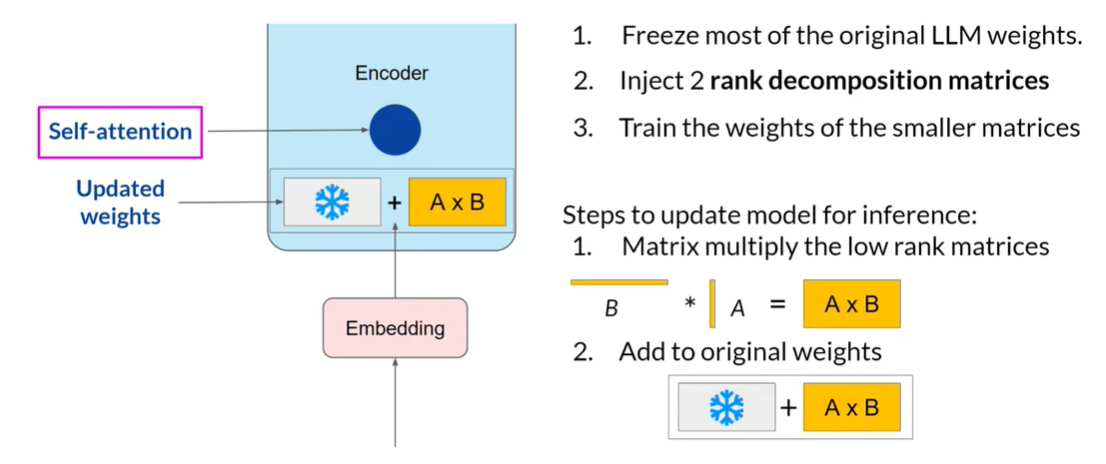

We can also apply LoRA to Feed-Forward network of transformer to improve the performance but there is no significant improvement as most of the parameters are present in attention component of transformer.

One strong example of LoRA is shown in below image.
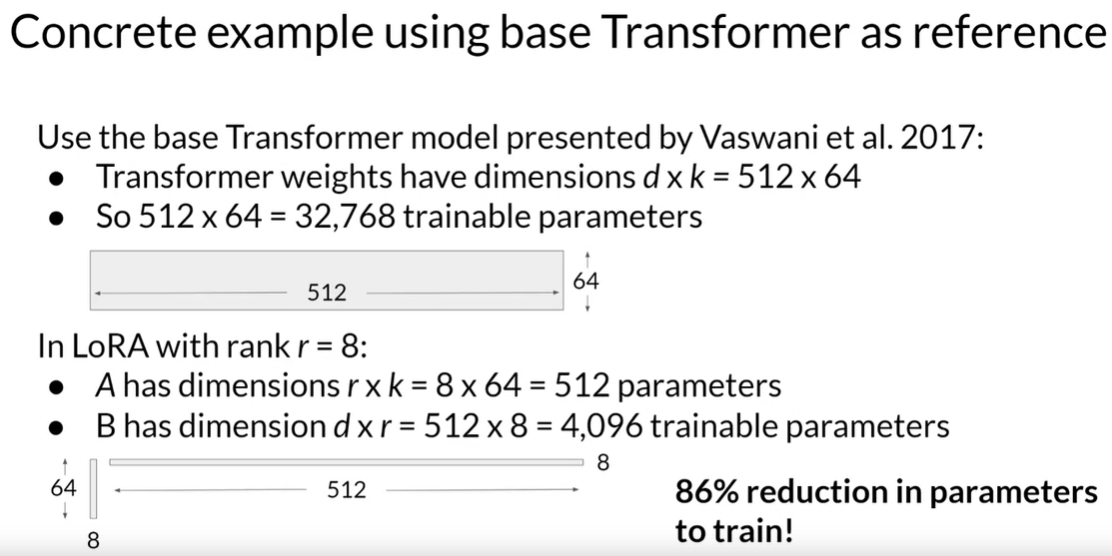

In Transformer, we have 512 x 64 as embedding size, So total number of parameters is 32768 which is too many. But with rank decomposition, size of these trainable parameters will be reduced drastically as mentioned in above image. So we will be training only 4608 parameters only as compared to 32768 parameters because of rank decomposition. So because of such drastic reduction of required number of parameter training, we can perform fine-tuning with only single GPU.

Since rank decomposition reduces number of parameters required to train, we can fine-tune using it for multiple tasks and switch between different models for different tasks.
This results in low memory size as we don't have to store full-size LLM for different tasks separately.

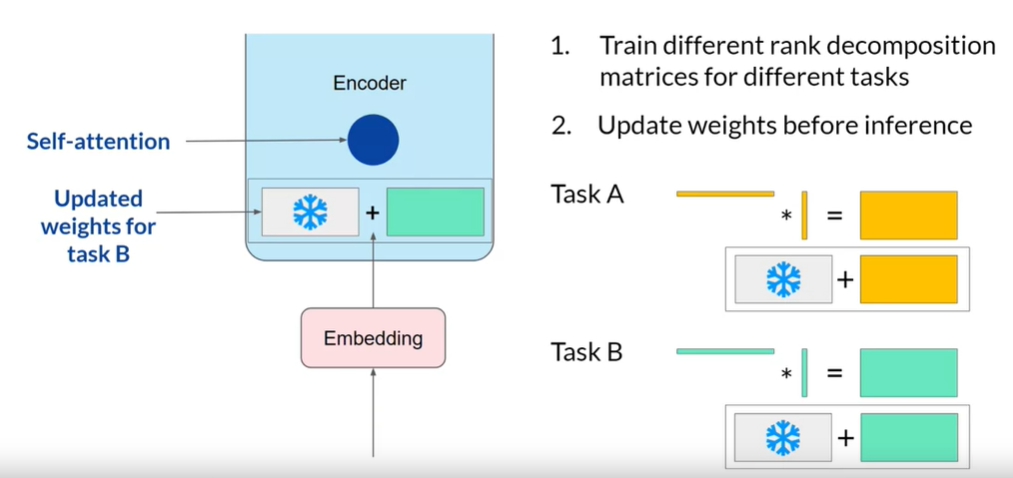

Below image shows performance of LoRA fine-tuned model against base model and instruction fine-tuned.

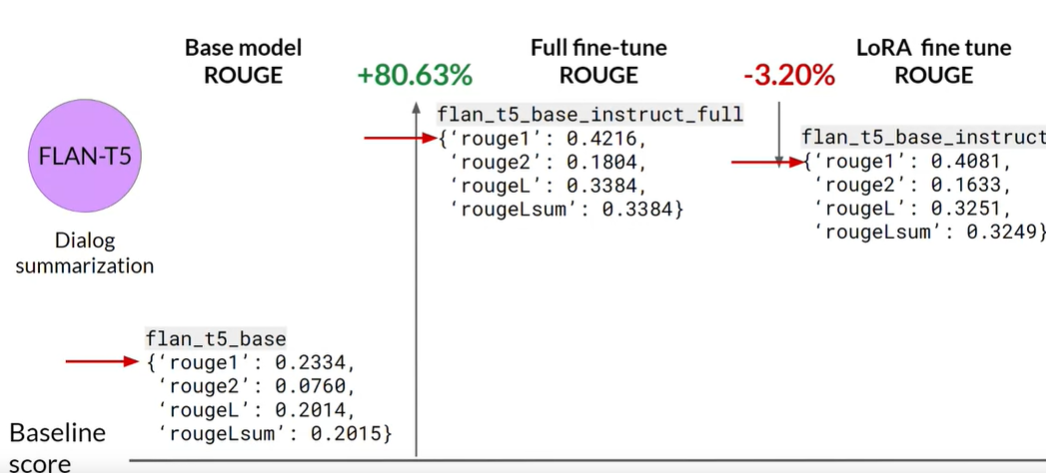

In above image, we see that LoRA fine-tuned model performs little less than fully-fine-tuned model but compute resources required for LoRA fine-tuned model is very very less as compared to fully fine-tuned model. So this small trade-off will be worth.

Important question is what should be value of rank?. So In-principle smaller the rank then smaller is the trainable parameters and larger the rank, larger is the trainable parameter. So finding out right rank value is still in research. 

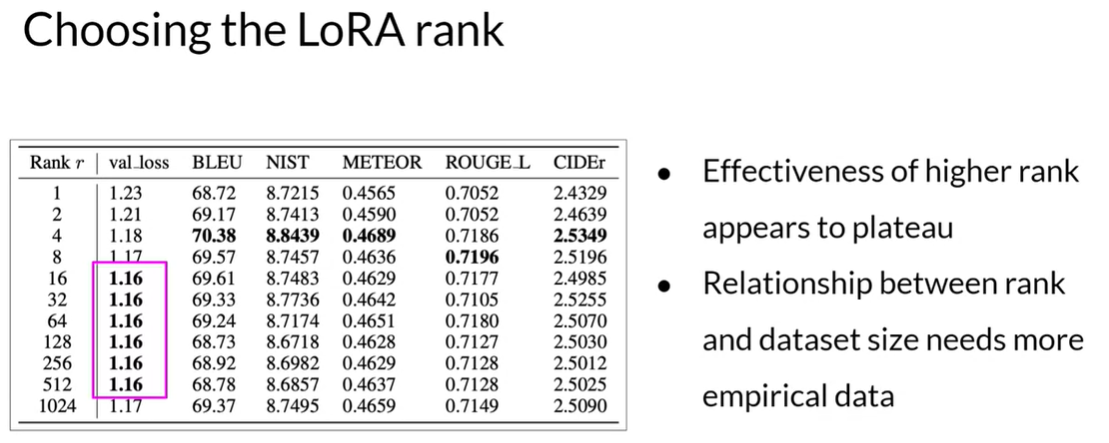

### Soft Prompt (Prompt Tuning)

Prompt Tuning is not prompt engineering. 
In this technique we add additional trainable tokens in prompt by keep all parameters frozen. In supervised learning process helps determine their optimal values. The set of trainable tokens is called a soft prompt, and it gets prepended to embedding vectors that represent your input text. 

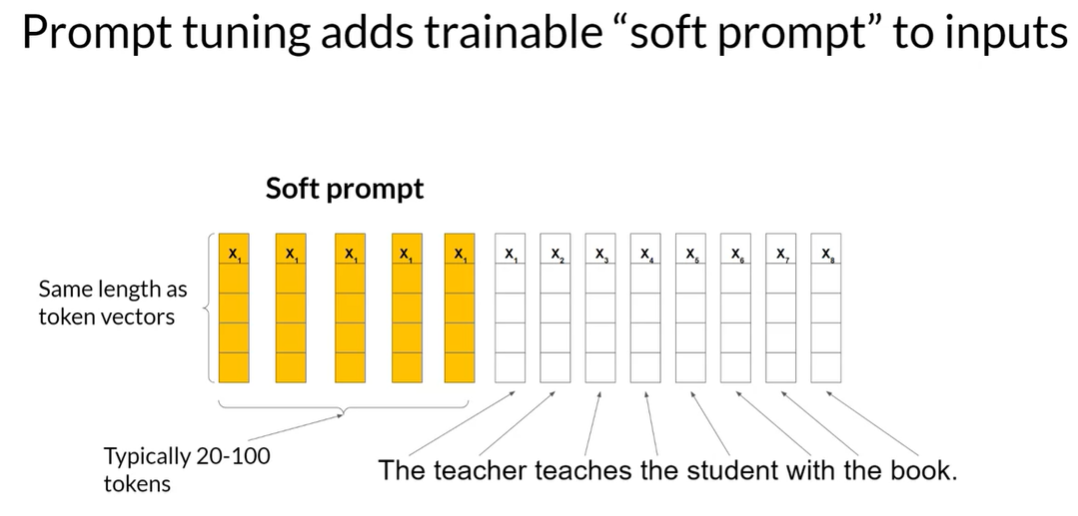

Tokens represent fixed location in embbedding vector space. But these prompt tokens are not fixed.Prompt tokens can take any values within the continuous multidimensional embedding space.

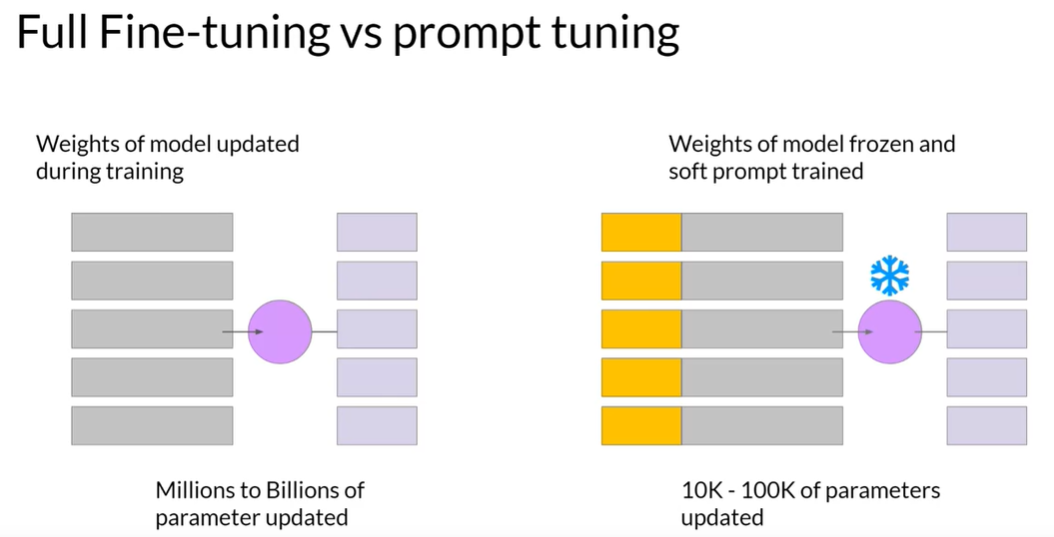

So here only Prompt Tokens are updated during training and rest of the parameters are frozen.
Similar to LoRA, You can train a different set of soft prompts for each task and then easily swap them out at inference time. To use them for inference, you prepend your input prompt with the learned tokens to switch to another task, you simply change the soft prompt.

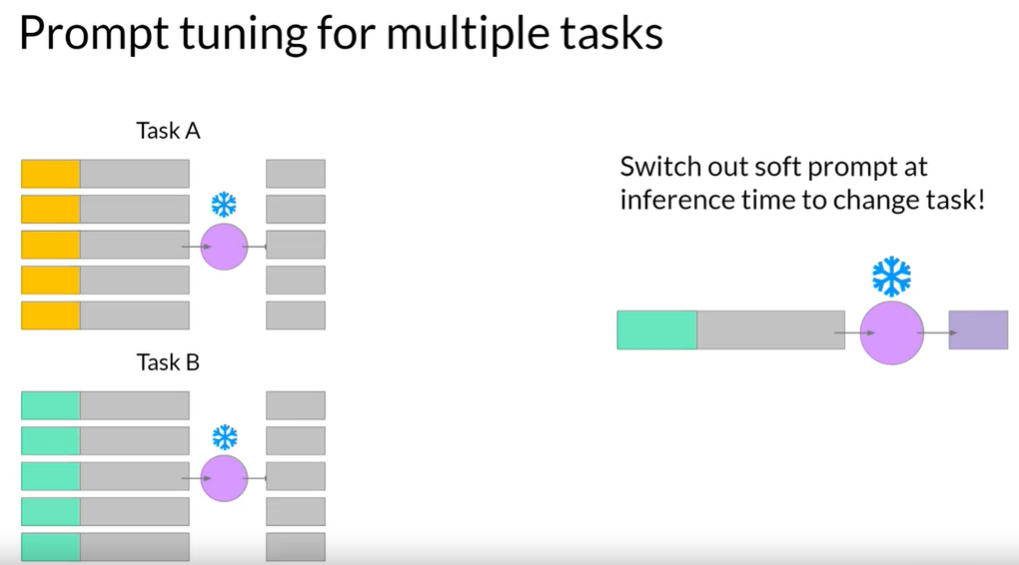

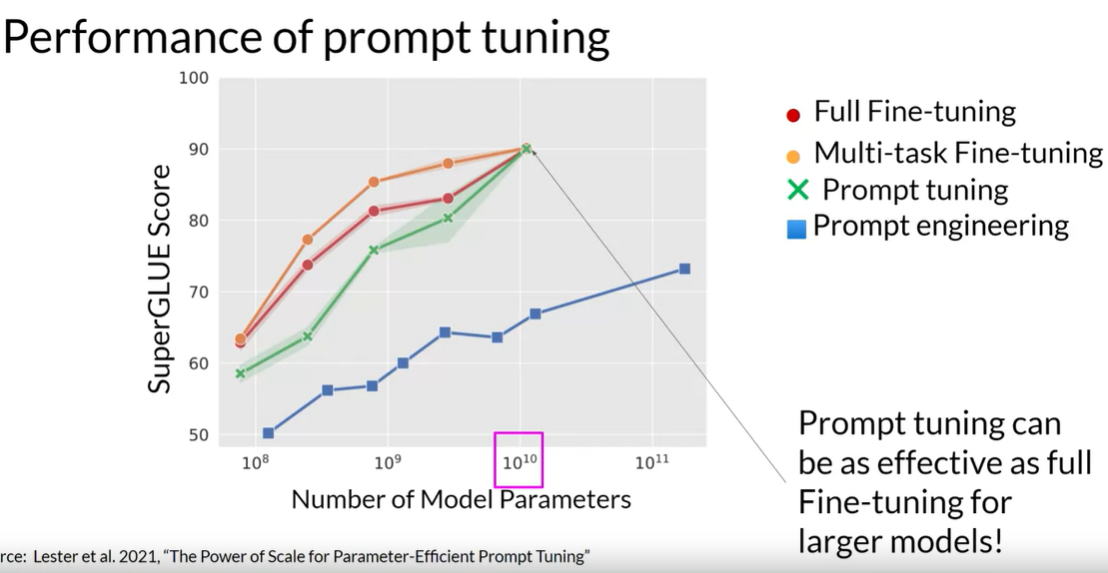

As you can see, prompt tuning doesn't perform as well as full fine tuning for smaller LLMs. However, as the model size increases, so does the performance of prompt tuning. And once models have around 10 billion parameters, prompt tuning can be as effective as full fine tuning and offers a significant boost in performance over prompt engineering alone.

Prompt tokens can take any values in embedding space but one research shows that words closer to prompt tokens have similar meaning.

**LoRA is preferred method in practice as compared to Soft prompt**